In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = 'C:/Users/manj1/Documents/projects/Remote_Job_Analysis/Stage1-DataGathering/data.csv'
df = pd.read_csv(data_path)
df.describe()

Matplotlib is building the font cache; this may take a moment.


,company,title,job-type,company-region,category
count,1012,1012,1012,986,1012
unique,624,855,2,8,8
top,TaxJar,Senior Product Designer,Full-Time,Anywhere (100% Remote) Only,Programming
freq,19,13,909,527,492


In [3]:
df.isna().sum()

company            0
title              0
job-type           0
company-region    26
category           0
dtype: int64

In [5]:
df['company-region'].fillna('Worldwide', inplace=True)
df['company-region'].replace('Anywhere (100% Remote) Only', 'Worldwide', inplace=True)

In [7]:
df.head()

,company,title,job-type,company-region,category
0,Contra,Senior Product Designer,Contract,Worldwide,Design
1,Aurora Solar,Senior Product Designer,Full-Time,North America Only,Design
2,InDebted,Senior Product Designer,Full-Time,Worldwide,Design
3,Speechify,Senior UI/Systems Designer,Full-Time,North America Only,Design
4,TaxJar,Senior Product Designer,Full-Time,USA Only,Design


**How entries are there for each category? Show plot**

In [16]:
category = df.category.value_counts()
category

Programming               492
Sales and Marketing       166
Design                     79
Customer Support           75
Product                    70
DevOps and Sysadmin        62
Management and Finance     46
Copywriting                22
Name: category, dtype: int64

<AxesSubplot:>

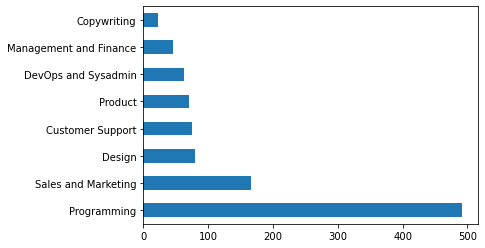

In [28]:
category.plot(kind='barh')

**Show agrregations based on company-region**

In [30]:
region = df['company-region'].value_counts()
region

Worldwide             553
USA Only              217
Europe Only            92
North America Only     87
Americas Only          35
Canada Only            12
EMEA Only              11
Asia Only               5
Name: company-region, dtype: int64

<AxesSubplot:>

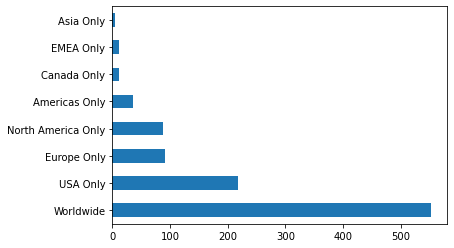

In [31]:
region.plot(kind='barh')

**How many entries contain both the top company-region and category?**

In [36]:
df[np.equal.outer(df.to_numpy(copy=False), ['Worldwide', 'Programming']).any(axis=1).all(axis=1)].describe()

,company,title,job-type,company-region,category
count,260,260,260,260,260
unique,184,238,2,1,1
top,X-Team,Engineering Manager,Full-Time,Worldwide,Programming
freq,8,4,229,260,260


**How many entries are for contract work in the top region?**

In [39]:
df[np.equal.outer(df.to_numpy(copy=False), ['Contract', 'Worldwide', 'Programming']).any(axis=1).all(axis=1)].describe()

,company,title,job-type,company-region,category
count,31,31,31,31,31
unique,22,31,1,1,1
top,Toptal,Senior Full-Stack Engineer,Contract,Worldwide,Programming
freq,5,1,31,31,31
